In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [311]:
import io
%cd "C:\Users\gmahe\OneDrive\Desktop\ml"

C:\Users\gmahe\OneDrive\Desktop\ml


In [312]:
# import bank-full.csv as bankdata
bankfile=pd.read_csv("bank-full.csv")

In [313]:
# info(),columns on data
bankfile.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [314]:
bankfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [315]:
# describe() of age, balance, duration
bankfile[['age','balance','duration']].describe()

,age,balance,duration
count,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080
std,10.618762,3044.765829,257.527812
min,18.000000,-8019.000000,0.000000
25%,33.000000,72.000000,103.000000
50%,39.000000,448.000000,180.000000
75%,48.000000,1428.000000,319.000000
max,95.000000,102127.000000,4918.000000


In [316]:
bankfile.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [317]:
bankfile.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<Axes: ylabel='count'>

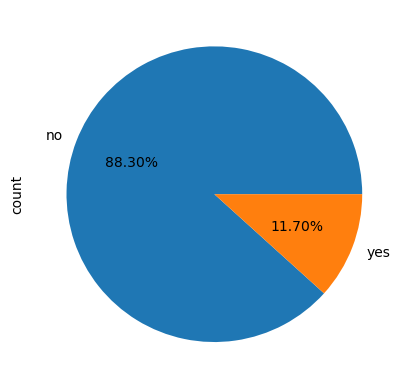

In [318]:
# Frequency counts of "y" with pie diagram & data labels
bankfile.y.value_counts().plot(kind="pie",autopct='%.2f%%')
# no - NO term Deposit(Negative) 

<Axes: ylabel='count'>

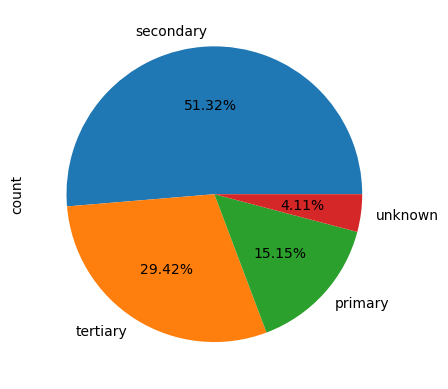

In [319]:
# Frequency counts of eduation with pie diagram & data label
bankfile.education.value_counts().plot(kind="pie",autopct='%.2f%%')

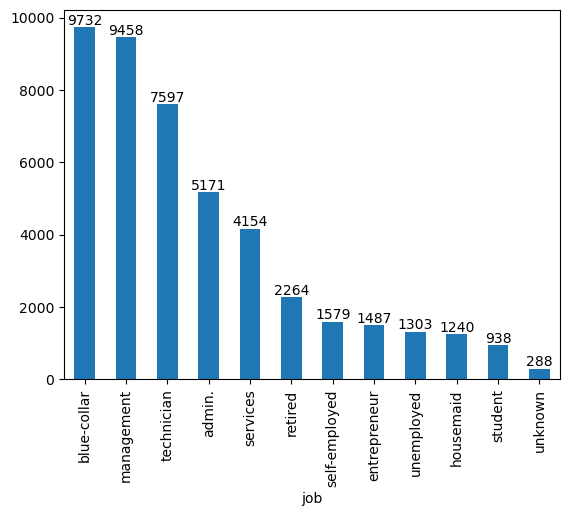

In [320]:
# Frequency counts of job with bar chart and data labels
ax=bankfile.job.value_counts().plot(kind="bar")
for i in ax.containers:
   ax.bar_label(i)

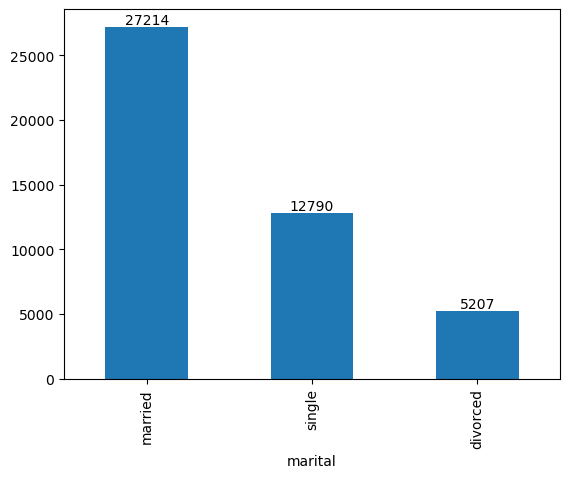

In [321]:
# Frequency Counts of "marital" & bar chart with datalabel
ax=bankfile.marital.value_counts().plot(kind="bar")
for i in ax.containers:
   ax.bar_label(i)

<Axes: xlabel='default'>

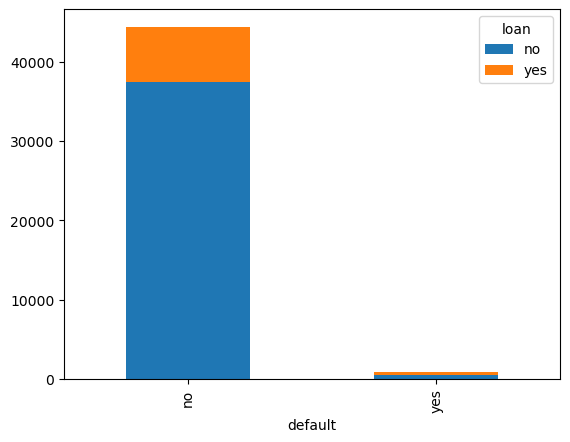

In [322]:
# Cross Tabulation of default & loan with Stacked Bar Chart & data labels
pd.crosstab(bankfile.default,bankfile.loan).plot(kind="bar",stacked=True)

<Axes: xlabel='housing'>

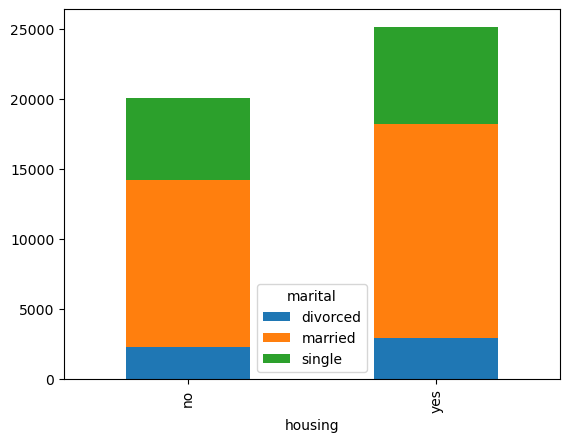

In [323]:
# Cross Tabulation of housing and marital with Stacked Bar Chart and data
pd.crosstab(bankfile.housing,bankfile.marital).plot(kind="bar",stacked=True)

In [324]:
# Histogram, Boxplot and Density Curve on balance and duration
import seaborn as sns

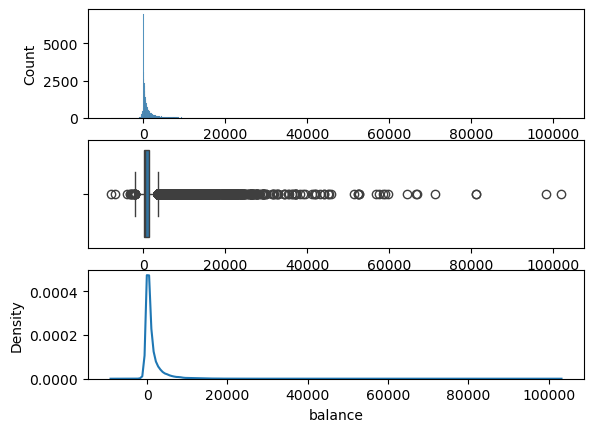

In [325]:
fig,ax=plt.subplots(3,1) # Break Plot window into 3 rows & 1 column
sns.histplot(bankfile.balance,ax=ax[0]) # Histogram
sns.boxplot(bankfile.balance,ax=ax[1],orient="h") # Boxplot - Horizontal
sns.kdeplot(bankfile.balance,ax=ax[2])# density curve
plt.show()

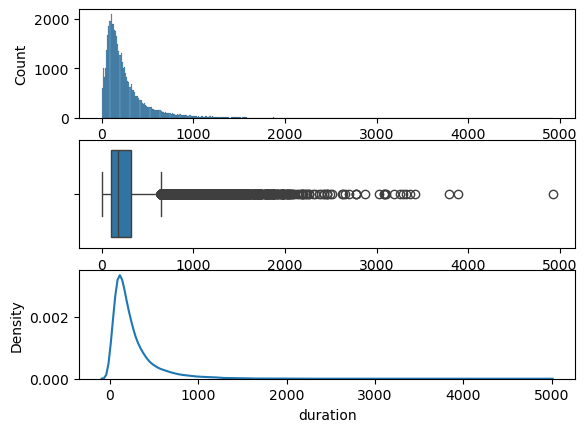

In [326]:
fig,ax=plt.subplots(3,1) # Break Plot window into 3 rows & 1 column
sns.histplot(bankfile.duration,ax=ax[0]) # Histogram
sns.boxplot(bankfile.duration,ax=ax[1],orient="h") # Boxplot - Horizontal
sns.kdeplot(bankfile.duration,ax=ax[2])# density curve
plt.show()

In [327]:
bankfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [328]:
# Average balance of y
bankfile.balance.groupby(bankfile.y).mean()

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

In [329]:
# Average balance of marital
bankfile.balance.groupby(bankfile.marital).mean()

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

In [330]:
# Average duration of job
bankfile.duration.groupby(bankfile.job).mean()

job
admin.           246.896732
blue-collar      262.901562
entrepreneur     256.309348
housemaid        245.825000
management       253.995771
retired          287.361307
self-employed    268.157061
services         259.318729
student          246.656716
technician       252.904962
unemployed       288.543361
unknown          237.611111
Name: duration, dtype: float64

In [331]:
# Median balance of education
bankfile.balance.groupby(bankfile.education).median()

education
primary      403.0
secondary    392.0
tertiary     577.0
unknown      568.0
Name: balance, dtype: float64

In [332]:
# Hypothesis Testing
# Test Null Average balance of y is equal

bankfile.balance.groupby(bankfile.y).mean()

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

In [333]:
noto=bankfile[bankfile.y=="no"]
yesto=bankfile[bankfile.y=="yes"]

In [334]:
from scipy.stats import ttest_ind

In [335]:
ttest_ind(noto.balance,yesto.balance,equal_var=False)
# since pvalue=4.3837327 less than 0.05 Reject null
# null- no 

TtestResult(statistic=-9.933545392962255, pvalue=4.3837327771001536e-23, df=6339.800439872401)

In [336]:
# Test Null Average balance of housing is equal

bankfile.balance.groupby(bankfile.housing).mean()

housing
no     1596.501270
yes    1175.103064
Name: balance, dtype: float64

In [337]:
noto=bankfile[bankfile.housing=="no"]
yesto=bankfile[bankfile.housing=="yes"]

In [338]:
ttest_ind(noto.balance,yesto.balance,equal_var=False)
# since pvalue=6.625425 less than 0.05 Reject null

TtestResult(statistic=14.081117553694206, pvalue=6.625425926072512e-45, df=34203.875314527795)

In [339]:
# Test Null Average balance of marital is equal
bankfile.balance.groupby(bankfile.marital).mean()

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

In [340]:
divorcedf=bankfile[bankfile.marital=="divorced"]
marriedf=bankfile[bankfile.marital=="married"]
singlef=bankfile[bankfile.marital=="single"]

In [341]:
from scipy.stats import f_oneway

In [342]:
f_oneway(divorcedf.balance,marriedf.balance,singlef.balance)
# since pvalue=1.60558 less than 0.05 Reject null

F_onewayResult(statistic=17.954318144453257, pvalue=1.6055869132631893e-08)

In [343]:
# Test Null Average duration of education is equal
bankfile.duration.groupby(bankfile.education).mean()

education
primary      255.933002
secondary    258.685760
tertiary     258.518532
unknown      257.313947
Name: duration, dtype: float64

In [344]:
prif=bankfile[bankfile.education=="primary"]
secf=bankfile[bankfile.education=="secondary"]
terf=bankfile[bankfile.education=="tertiary"]
unkf=bankfile[bankfile.education=="unknown"]

In [345]:
f_oneway(prif.balance,secf.balance,terf.balance,unkf.balance)
# since pvalue=2.849537  less than 0.05 Reject null

F_onewayResult(statistic=116.68207421466668, pvalue=2.8495378703538485e-75)

In [346]:
# Test Null No Association between y and default
pd.crosstab(bankfile.y,bankfile.default)

default,no,yes
y,,
no,39159,763
yes,5237,52


In [347]:
from scipy.stats import chi2_contingency

In [348]:
chi2_contingency(pd.crosstab(bankfile.y,bankfile.default))

Chi2ContingencyResult(statistic=22.20224995571685, pvalue=2.4538606753508344e-06, dof=1, expected_freq=array([[39202.34261574,   719.65738426],
       [ 5193.65738426,    95.34261574]]))

In [349]:
# Test Null No Association between loan and housing
chi2_contingency(pd.crosstab(bankfile.loan,bankfile.housing))

Chi2ContingencyResult(statistic=76.97480834381858, pvalue=1.7315256945310098e-18, dof=1, expected_freq=array([[16863.49178297, 21103.50821703],
       [ 3217.50821703,  4026.49178297]]))

In [350]:
# Test Null No Association between marital and y
chi2_contingency(pd.crosstab(bankfile.marital,bankfile.y))

Chi2ContingencyResult(statistic=196.49594565603957, pvalue=2.1450999986791792e-43, dof=2, expected_freq=array([[ 4597.86012254,   609.13987746],
       [24030.37552808,  3183.62447192],
       [11293.76434938,  1496.23565062]]))

In [351]:
# Test Null No Association between education and job
chi2_contingency(pd.crosstab(bankfile.education,bankfile.job))

Chi2ContingencyResult(statistic=28483.1364531764, pvalue=0.0, dof=33, expected_freq=array([[ 783.58189379, 1474.72809714,  225.33093716,  187.90205923,
        1433.20780341,  343.07279202,  239.27205769,  629.47189843,
         142.13881577, 1151.20318064,  197.44869611,   43.6417686 ],
       [2653.7245803 , 4994.4010086 ,  763.11901971,  636.36017783,
        4853.78593705, 1161.87051824,  810.33283935, 2131.80659574,
         481.37568291, 3898.73247661,  668.69138042,  147.79978324],
       [1521.29948464, 2863.13799739,  437.47289376,  364.80591007,
        2782.5276592 ,  666.06498419,  464.53913871, 1222.09979872,
         275.95801907, 2235.02459578,  383.34040388,   84.7291146 ],
       [ 212.39404127,  399.73289686,   61.07714937,   50.93185287,
         388.47860034,   92.99170556,   64.85596426,  170.62170711,
          38.52748225,  312.03974696,   53.51951959,   11.82933357]]))

In [352]:
numcols=bankfile.select_dtypes(include=np.number)
objcols=bankfile.select_dtypes(include=["object"])

In [353]:
# labelencode dependent variables
from sklearn.preprocessing import StandardScaler

In [354]:
numcols_scale=StandardScaler().fit_transform(numcols)

In [355]:
numcols_scale=pd.DataFrame(numcols_scale,columns=numcols.columns)

In [356]:
objcols.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [357]:
objcols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [358]:
objcols_dummy=pd.get_dummies(objcols,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'poutcome'])

In [359]:
# concat num & obj into 1
bankfile_final=pd.concat([numcols_scale,objcols_dummy],axis=1)

In [360]:
# spilt data dependent variable (y) & independent variable(x)
y=bankfile.y
x=bankfile_final.drop('y',axis=1)

In [361]:
# classification models - dependent variable must be label encoded
from sklearn.preprocessing import LabelEncoder

In [362]:
y=LabelEncoder().fit_transform(y)

In [363]:
from sklearn.linear_model import LogisticRegression

In [364]:
logit=LogisticRegression(max_iter=2000).fit(x,y)
logit.score(x,y)

0.9017495742186636

In [365]:
logit_pred=logit.predict(x)

In [366]:
pd.crosstab(y,logit_pred) # confusion matrix

col_0,0,1
row_0,,
0,38940,982
1,3460,1829


In [367]:
# b) Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [368]:
from sklearn.model_selection import cross_val_score
cross_val_score(treemodel,x,y)

array([0.88300343, 0.75094006, 0.73921699, 0.4954656 , 0.79550984])

In [369]:
treemodel=DecisionTreeClassifier(max_depth=6).fit(x,y)

In [370]:
treemodel.score(x,y)

0.9061069208820862

In [371]:
tree_pred=treemodel.predict(x)

In [372]:
pd.crosstab(y,tree_pred)

col_0,0,1
row_0,,
0,38646,1276
1,2969,2320


In [373]:
# c) Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [374]:
rfmodel=RandomForestClassifier(n_estimators=2000).fit(x,y)

In [375]:
rfmodel.score(x,y)

1.0

In [376]:
rf_pred=rfmodel.predict(x)

In [377]:
pd.crosstab(y,rf_pred)

col_0,0,1
row_0,,
0,39922,0
1,0,5289
